In [1]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

# 211016
Russula 92번 이미지 깨져서 삭제  
깨진 이미지 있어도 진행하는 방법이 있어서 해보았으나 처리가 안됨 

In [2]:
def imshow(img):
    img = img /2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

In [3]:
import os

os.listdir('./Mushrooms_images')

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [4]:
trans = transforms.Compose([transforms.Resize((32,32)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])

trainset = torchvision.datasets.ImageFolder(root = "./Mushrooms_images",
                                           transform = trans)

In [5]:
len(trainset)

6713

In [6]:
trainloader = DataLoader(trainset,
                        batch_size = 4,
                        shuffle = True,
                        num_workers = 2)

In [7]:
classes = trainset.classes
classes

['Agaricus',
 'Amanita',
 'Boletus',
 'Cortinarius',
 'Entoloma',
 'Hygrocybe',
 'Lactarius',
 'Russula',
 'Suillus']

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([6, 0, 3, 8])


torch.Size([4, 3, 32, 32])
(3, 36, 138)
(36, 138, 3)
torch.Size([4, 3, 32, 32])
torch.Size([3, 36, 138])
Lactarius Agaricus Cortinarius Suillus 


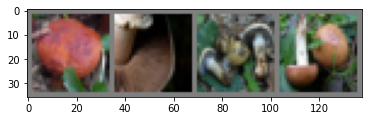

In [9]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4)) # imshow 함수 호출
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(4)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # kernel=5, paddig=0. stride=1. 32-5+1=28
        self.pool = nn.MaxPool2d(2, 2)  # 14
        self.conv2 = nn.Conv2d(6, 16, 5) # kernel=5, paddig=0. stride=1. 14-5+1=10 => max pooling 후 5X5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 211017
Adam으로 변경, momentum 0.9와 0.999로 변화

In [11]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

# 211017 
running_loss 계산 식 수정

In [12]:
for epoch in range(25):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 200 == 199:    
            print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 2.067
[1,   400] loss: 2.077
[1,   600] loss: 1.977
[1,   800] loss: 1.946
[1,  1000] loss: 1.892
[1,  1200] loss: 1.874
[1,  1400] loss: 1.886
[1,  1600] loss: 1.875
[2,   200] loss: 1.792
[2,   400] loss: 1.832
[2,   600] loss: 1.821
[2,   800] loss: 1.790
[2,  1000] loss: 1.784
[2,  1200] loss: 1.761
[2,  1400] loss: 1.762
[2,  1600] loss: 1.761
[3,   200] loss: 1.660
[3,   400] loss: 1.653
[3,   600] loss: 1.734
[3,   800] loss: 1.689
[3,  1000] loss: 1.690
[3,  1200] loss: 1.754
[3,  1400] loss: 1.636
[3,  1600] loss: 1.646
[4,   200] loss: 1.567
[4,   400] loss: 1.645
[4,   600] loss: 1.630
[4,   800] loss: 1.547
[4,  1000] loss: 1.621
[4,  1200] loss: 1.513
[4,  1400] loss: 1.550
[4,  1600] loss: 1.529
[5,   200] loss: 1.403
[5,   400] loss: 1.472
[5,   600] loss: 1.532
[5,   800] loss: 1.476
[5,  1000] loss: 1.459
[5,  1200] loss: 1.448
[5,  1400] loss: 1.551
[5,  1600] loss: 1.495
[6,   200] loss: 1.431
[6,   400] loss: 1.327
[6,   600] loss: 1.385
[6,   800] 

(3, 36, 138)
(36, 138, 3)
GroundTruth:  Russula Boletus Entoloma Lactarius


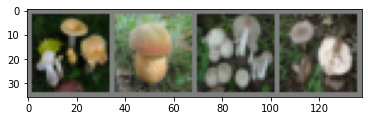

In [13]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
#images, labels = dataiter.next()
# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Russula Boletus Entoloma Lactarius


In [16]:
dataiter = iter(trainloader)
correct = 0
for i in range(1000):
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    
    for j in range(4):
        if labels[j] == predicted[j]:
            correct += 1

print('%.3f' % (correct/(i*4) * 100), '%')            
  

95.445 %
